In [1]:
import pandas as pd

<Axes: xlabel='timestamp'>

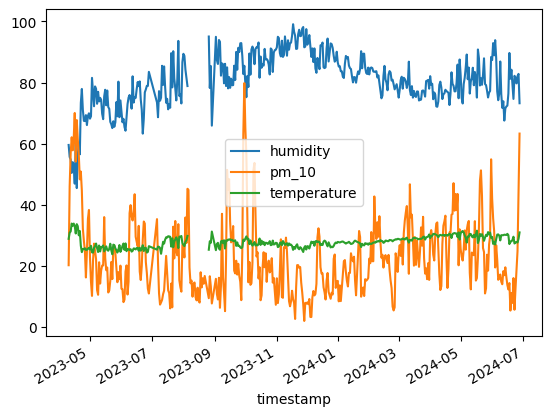

In [ ]:
df = pd.read_excel('pm-data\export-r202_test_nbiot-1d.xlsx')
df = df.set_index('timestamp')
df = df.drop(columns=['Unnamed: 0','timezone','pm_2_5','pm_2_5_sp'])
# df = df.drop(df.loc['2022-10-25 07:00:00':'2023-03-18 07:00:00'].index)
# df = df.drop(df.loc['2023-12-31 07:00:00':].index)
# df = df.iloc[1:]
# df = df.drop(df[df['pm_10'] > 100].index)
# df = df.drop(df[df['pm_10'] == 0].index)
# df = df.drop(df[df['temperature'] >37].index)
df.plot()

In [3]:
data = pd.DataFrame()

<Axes: xlabel='timestamp'>

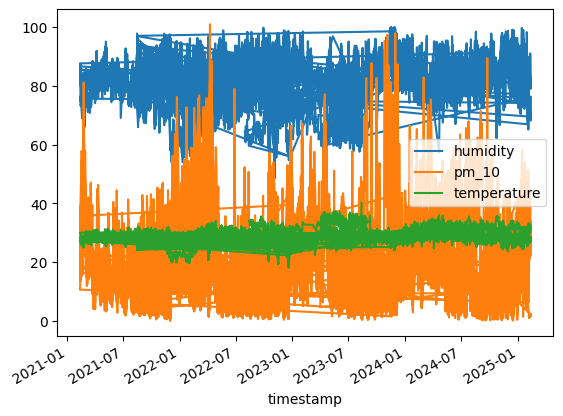

In [84]:
data = pd.concat([data, df])
data.plot()

<Axes: >

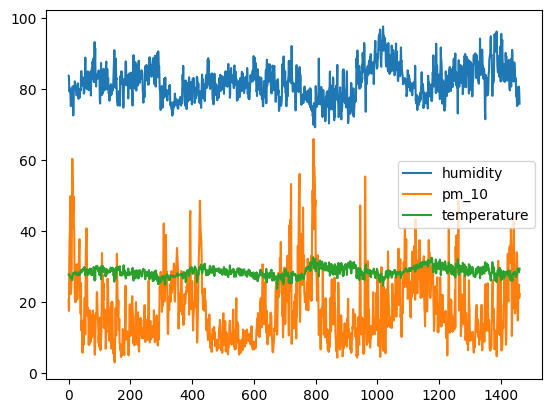

In [ ]:
data = data.groupby(data.index).mean()
data.plot()

In [1]:
import pandas as pd
df = pd.read_csv('pm-data\pm10.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
df

,humidity,pm_10,temperature
timestamp,,,
2021-02-12,83.780920,20.561082,27.690057
2021-02-13,83.710912,17.448686,27.675274
2021-02-14,79.459665,31.856245,27.677253
2021-02-15,79.789949,37.315597,27.440677
2021-02-16,79.357195,39.958193,27.287088
...,...,...,...
2025-02-07,78.300175,23.158050,29.135241
2025-02-08,76.826678,21.054198,29.359010
2025-02-09,80.747335,24.845696,28.367708


In [61]:
from pycaret.time_series import *
s = setup(df, fh = 7, fold = 3, session_id = 123, target='pm_10')

,Description,Value
0,session_id,123
1,Target,pm_10
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(1461, 3)"
5,Transformed data shape,"(1461, 3)"
6,Transformed train set shape,"(1454, 3)"
7,Transformed test set shape,"(7, 3)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [62]:
best_model = compare_models(n_select = 3)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
croston,Croston,1.3074,1.0904,7.2501,8.3669,0.3449,0.2815,-0.0074,0.0267
auto_arima,Auto ARIMA,1.3859,1.2615,7.6926,9.6859,0.3555,0.3032,-0.5053,16.9233
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1.4991,1.3147,8.3191,10.0963,0.3352,0.3336,-0.7466,0.2700
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1.4992,1.3131,8.3201,10.0843,0.3384,0.3336,-0.7641,0.1633
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.4992,1.3131,8.3202,10.0843,0.3384,0.3336,-0.7641,0.1533
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.5063,1.2467,8.3559,9.5722,0.3390,0.3367,-0.6064,0.2367
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.5080,1.3548,8.3735,10.4067,0.3638,0.3373,-1.0144,0.1567
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1.5248,1.3403,8.4609,10.2929,0.3344,0.3402,-0.7949,0.1633
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1.5260,1.3415,8.4674,10.3022,0.3345,0.3405,-0.7975,0.1633
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.5260,1.3416,8.4674,10.3022,0.3345,0.3405,-0.7975,0.1767


In [ ]:
# blender = blend_models(best_model)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2025-01-14,1.3419,1.2567,7.3987,9.5793,0.4623,0.3125,0.0114
1,2025-01-21,1.5759,1.2981,8.7555,9.9865,0.3236,0.3261,-0.0146
2,2025-01-28,1.0452,0.9137,5.8331,7.0614,0.1969,0.2230,-0.6744
Mean,NaT,1.3210,1.1562,7.3291,8.8757,0.3276,0.2872,-0.2258
SD,NaT,0.2172,0.1723,1.1941,1.2936,0.1084,0.0458,0.3173


In [71]:
# dt = create_model(blender)
dt = create_model('auto_arima')

In [72]:
tuned_dt = tune_model(dt, choose_better=True, optimize = 'R2') #

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2025-01-14,1.2696,1.3257,7.0001,10.1052,0.4845,0.2968,-0.1001
1,2025-01-21,1.6926,1.3838,9.4040,10.6461,0.3679,0.3505,-0.1530
2,2025-01-28,1.0947,0.9661,6.1095,7.4663,0.2027,0.2351,-0.8719
Mean,NaT,1.3523,1.2252,7.5046,9.4059,0.3517,0.2941,-0.3750
SD,NaT,0.2510,0.1847,1.3915,1.3892,0.1156,0.0472,0.3520


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  2.3min finished


In [73]:
plot_model(tuned_dt, plot = 'forecast') # data_kwargs = {'fh' : 7}

In [2]:
final_best = finalize_model(tuned_dt)
predict_model(tuned_dt, fh = 7)

NameError: name 'finalize_model' is not defined